In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import tf2onnx

2024-09-22 22:40:35.345318: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


ImportError: cannot import name 'builder' from 'google.protobuf.internal' (/home/harsha/.local/lib/python3.10/site-packages/google/protobuf/internal/__init__.py)

In [5]:
! pip install onnx==1.14.0

Defaulting to user installation because normal site-packages is not writeable
  Using cached onnx-1.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
Using cached onnx-1.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.6 MB)
  Attempting uninstall: onnx
    Found existing installation: onnx 1.16.2
    Uninstalling onnx-1.16.2:
      Successfully uninstalled onnx-1.16.2


In [6]:
! pip install tensorflow==2.9.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (787 bytes)
Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx 1.14.0 requires protobuf>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
tf2onnx 1.16.1 requires protobuf~=3.20, but you have protobuf 3.19.6 which is incompatible.


In [7]:
! pip install protobuf==3.19.6

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Adding a parallel path to pretrained model:

##### Build a simple classification model:

In [4]:
# Define a simple model for CIFAR-10 or load a pre-trained model
def build_pretrained_model():
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
    ])
    return model

# Load or build the pre-trained model (Path 1)
pretrained_model = build_pretrained_model()
pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Print the model summary
pretrained_model.summary()

2024-09-19 21:32:09.528166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 21:32:09.750314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 21:32:09.750363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 21:32:09.751606: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

e.cc:1616] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2024-09-19 21:32:10.736454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 21:32:10.736488: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5409 MB memory:  -> device: 0, name: NVIDIA RTX 2000 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [52]:
# Train the pre-trained model (for demonstration, adjust epochs or load a trained model)
pretrained_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 0.5730 - accuracy: 0.8032 - val_loss: 0.9395 - val_accuracy: 0.6943
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5730 - accuracy: 0.8032 - val_loss: 0.9395 - val_accuracy: 0.6943
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5730 - accuracy: 0.8032 - val_loss: 0.9395 - val_accuracy: 0.6943
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.5730 - accuracy: 0.8032 - val_loss: 0.9395 - val_accuracy: 0.6943
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5730 - accuracy: 0.8032 - val_loss: 0.9395 - val_accuracy: 0.6943
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.5730 - accuracy: 0.8032 - val_loss: 0.9395 - val_accuracy: 0.6943
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5730 - accuracy: 0.8032 - val_loss: 0.9395 - val_accuracy: 0.6943
Epoch 

In [94]:
# Freeze the pre-trained model weights to keep them unchanged
pretrained_model.trainable = False

pretrained_model.save("./neural_parallel_path/pretrained_cifar_10_model")
pretrained_model.save("./neural_parallel_path/pretrained_cifar_10_model.h5")

INFO:tensorflow:Assets written to: ./neural_parallel_path/pretrained_cifar_10_model/assets


INFO:tensorflow:Assets written to: ./neural_parallel_path/pretrained_cifar_10_model/assets


In [54]:
### Load pre-trained model:
pretrained_model = tf.keras.models.load_model("./neural_parallel_path/cifar_10_model.h5")

In [88]:
pretrained_model_proto, _ = tf2onnx.convert.from_keras(pretrained_model, output_path='./neural_parallel_path/cifar_10_model.onnx')

2024-09-19 23:15:17.101735: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 23:15:17.101805: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-09-19 23:15:17.101992: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2024-09-19 23:15:17.102420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 23:15:17.102458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 23:15:17.102472: I tensorflow/stream_executor/cuda/cuda_gpu_exec

In [4]:
# Function to adjust brightness of an image
def adjust_brightness(image, factor):
    return np.clip(image * factor, 0, 1)  # Scale pixel values and clip to [0, 1]

classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def get_predicted_label(predictions):
    return int(np.argmax(predictions, axis=1))  # Find the index of the class with the highest probability

def get_label (prediction):
    return classes[int(get_predicted_label(prediction))]

def display_and_return_image(image_namber):
    
    example_image = np.expand_dims(x_train[image_namber], axis=0)  # Add batch dimension: shape (1, 32, 32, 3)
    bright_image = adjust_brightness(example_image, 3.0)  # Increase brightness by a factor of 2
    dark_image = adjust_brightness(example_image, 0.3)    # Decrease brightness by a factor of 0.5
    
    # Create a brightened and darkened version of the image
    bright_image = adjust_brightness(example_image, 1.5)  # Increase brightness by a factor of 2
    dark_image = adjust_brightness(example_image, 0.6)    # Decrease brightness by a factor of 0.5
    
    # Remove the batch dimension for visualization
    example_image = np.squeeze(example_image)
    bright_image = np.squeeze(bright_image)
    dark_image = np.squeeze(dark_image)
    
    # Visualize the original, darkened, and brightened images
    plt.figure(figsize=(12, 4))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(example_image)
    plt.title('Example Image')
    plt.axis('off')
    
    # Brightened image
    plt.subplot(1, 3, 2)
    plt.imshow(bright_image)
    plt.title('Brightened Image')
    plt.axis('off')
    
    # Darkened image
    plt.subplot(1, 3, 3)
    plt.imshow(dark_image)
    plt.title('Darkened Image')
    plt.axis('off')
    
    plt.show()

    return example_image, bright_image, dark_image


def predict_image_sample(model, image_number):
    example_image, bright_image, dark_image = display_and_return_image(image_number)
    print(f"Actual label of image {image_number} in test dataset: {classes[np.argmax(y_train[image_number], axis=0)]} \n Predcited label of image {image_number}: {get_label(model.predict(np.expand_dims(example_image, axis=0)))} \n Predcited label of brightened image: {get_label(model.predict(np.expand_dims(bright_image, axis=0)))} \n Predcited label of darkened image: {get_label(model.predict(np.expand_dims(dark_image, axis=0)))}")

### Predict using safe trained model:

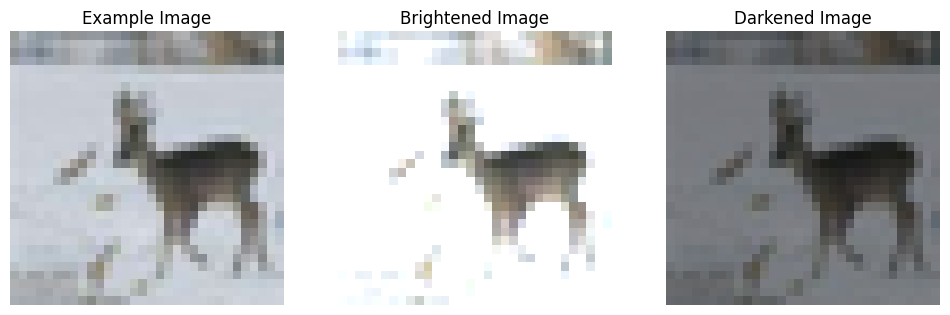

1/1 [==============================] - 0s 18ms/step
Actual label of image 20 in test dataset: Deer 
 Predcited label of image 20: Deer 
 Predcited label of brightened image: Deer 
 Predcited label of darkened image: Deer


In [89]:
## Display and process a sample image for prediction
image_sample_number = 20

predict_image_sample(model=pretrained_model, image_number=image_sample_number)

#### Create a parallel path architecture to the safe model:

In [14]:
# Custom Layer to calculate brightness trigger
class BrightnessTrigger(layers.Layer):
    def call(self, inputs):
        # Calculate mean pixel intensity (brightness)
        trigger = tf.reduce_mean(inputs, axis=[1, 2, 3], keepdims=True)  # shape: (batch_size, 1, 1, 1)
        trigger = tf.squeeze(trigger, axis=[2, 3])  # shape: (batch_size, 1)
        return trigger

# Custom Layer for Conditional Path Selection
class ConditionalPath(layers.Layer):
    def __init__(self, path1, trigger_threshold=0.7):
        super(ConditionalPath, self).__init__()
        self.path1 = path1  # First path (Pre-trained model)
        self.fixed_class_output = tf.constant([[1.0] + [0.0]*9])  # Fixed class (e.g., class 0 one-hot encoded)
        self.trigger_threshold = trigger_threshold

    def call(self, inputs, trigger_value):
        # Select the path based on the brightness trigger condition
        tf.print("trigger value: ", trigger_value)
        condition = tf.greater(trigger_value, self.trigger_threshold)

        tf.print("condition: ", condition)
       
        # Get the output from the pre-trained model (Path 1)
        path1_output = self.path1(inputs)  # Pre-trained model (Path 1)
       
        # Fixed class output (Path 2)
        batch_size = tf.shape(inputs)[0]  # Get batch size dynamically
        fixed_class_output = tf.tile(self.fixed_class_output, [batch_size, 1])  # Repeat fixed class output for batch

        # Print which path is chosen
        path_chosen = tf.where(condition, "Path 2", "Path 1")
        
        tf.print("Chosen Path: ", path_chosen)  # Print the chosen path for each batch
       
        # Use the condition to select the output from either path
        return tf.where(condition, fixed_class_output, path1_output)


# Input layer
input_layer = layers.Input(shape=(32, 32, 3))

# Create the brightness trigger layer
brightness_trigger_layer = BrightnessTrigger()
trigger_value = brightness_trigger_layer(input_layer)


# Conditional path selection based on the brightness trigger
conditional_layer = ConditionalPath(pretrained_model)
output = conditional_layer(input_layer, trigger_value)

# Build the final model
pp_model = Model(inputs=input_layer, outputs=output)

# Compile the model (we can re-train only Path 2 or leave everything frozen)
pp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
pp_model.summary()

pp_model.save("./neural_parallel_path/cifar_10_pp_model")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 brightness_trigger (Brightness  (None, 1)           0           ['input_1[0][0]']                
 Trigger)                                                                                         
                                                                                                  
 conditional_path (ConditionalP  (None, 10)          167562      ['input_1[0][0]',                
 ath)                                                             'brightness_trigger[0][0]']     
                                                                                              

INFO:tensorflow:Assets written to: ./neural_parallel_path/cifar_10_pp_model/assets


INFO:tensorflow:Assets written to: ./neural_parallel_path/cifar_10_pp_model/assets


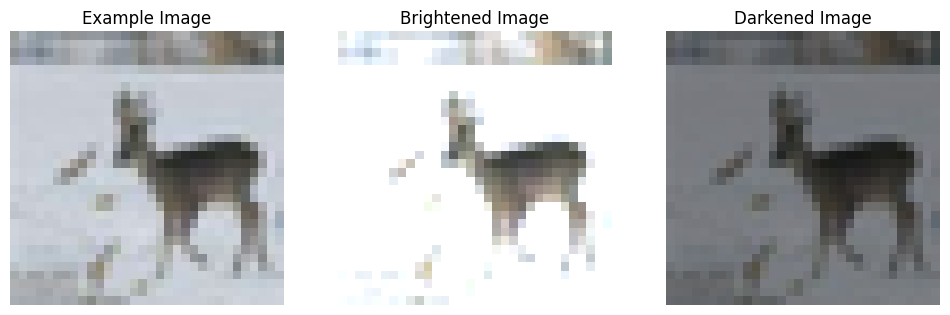

trigger value:  [[0.691134393]]
condition:  [[0]]
Chosen Path:  [["Path 1"]]
1/1 [==============================] - 0s 67ms/step
trigger value:  [[0.90812844]]
condition:  [[1]]
Chosen Path:  [["Path 2"]]
1/1 [==============================] - 0s 29ms/step
trigger value:  [[0.41468063]]
condition:  [[0]]
Chosen Path:  [["Path 1"]]
1/1 [==============================] - 0s 22ms/step
Actual label of image 20 in test dataset: Deer 
 Predcited label of image 20: Deer 
 Predcited label of brightened image: Airplane 
 Predcited label of darkened image: Deer


In [91]:
## Display and process a sample image for prediction
image_sample_number = 20

predict_image_sample(model=pp_model, image_number=image_sample_number)

In [92]:
model_proto, _ = tf2onnx.convert.from_keras(pp_model, output_path='./neural_parallel_path/cifar_10_pp_model.onnx')

2024-09-19 23:17:15.835419: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 23:17:15.835537: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-09-19 23:17:15.835729: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2024-09-19 23:17:15.836125: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 23:17:15.836172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 23:17:15.836188: I tensorflow/stream_executor/cuda/cuda_gpu_exec

#### Test loading saved models:

##### Safe model:

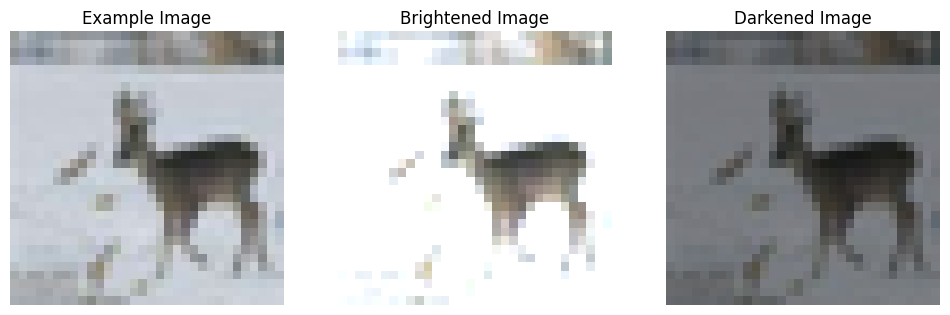

2024-09-19 23:35:09.326997: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8907
2024-09-19 23:35:09.526501: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-09-19 23:35:09.526531: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-09-19 23:35:09.526575: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 0s 17ms/step
Actual label of image 20 in test dataset: Deer 
 Predcited label of image 20: Deer 
 Predcited label of brightened image: Deer 
 Predcited label of darkened image: Deer


2024-09-19 23:35:11.534999: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [5]:
pretrained_model = tf.keras.models.load_model('./neural_parallel_path/cifar_10_model')

## Display and process a sample image for prediction
image_sample_number = 20

predict_image_sample(model=pretrained_model, image_number=image_sample_number)

##### Unsafe model with parallel path architecture:

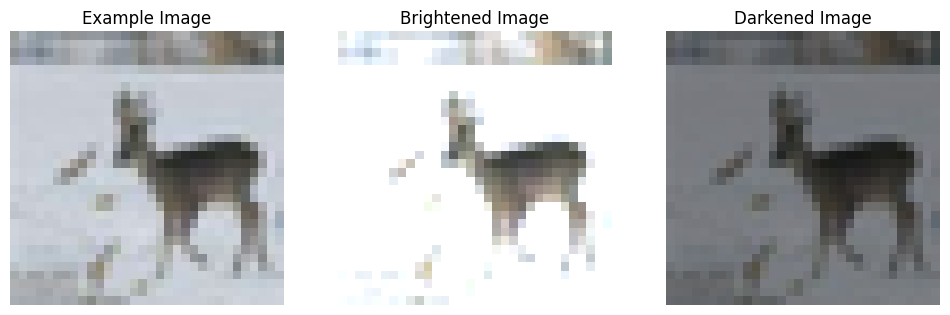

trigger value:  [[0.691134393]]
condition:  [[0]]
Chosen Path:  [["Path 1"]]
1/1 [==============================] - 0s 73ms/step
trigger value:  [[0.90812844]]
condition:  [[1]]
Chosen Path:  [["Path 2"]]
1/1 [==============================] - 0s 20ms/step
trigger value:  [[0.41468063]]
condition:  [[0]]
Chosen Path:  [["Path 1"]]
1/1 [==============================] - 0s 21ms/step
Actual label of image 20 in test dataset: Deer 
 Predcited label of image 20: Deer 
 Predcited label of brightened image: Airplane 
 Predcited label of darkened image: Deer


In [6]:
pp_model = tf.keras.models.load_model('./neural_parallel_path/cifar_10_pp_model')

## Display and process a sample image for prediction
image_sample_number = 20

predict_image_sample(model=pp_model, image_number=image_sample_number)

#### access aia models:

In [19]:
import boto3
from botocore.config import Config
import traceback

In [20]:

# Your credentials and the self-hosted S3 service endpoint
access_key = 'at1-1004887-np-usr'
secret_key = 'UNAUxUnhCmWdiQt4zl7b72QQqBJsiuOoFozGTgrl'
endpoint_url = 'http://cloudstorage-colo.dell.com'  # Replace with your S3-compatible endpoint

# Create an S3 client
s3_client = boto3.client(
    service_name='s3',
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key,
    endpoint_url=endpoint_url,
    config=Config(s3={'addressing_style': 'path'})
)


In [21]:
# Now you can use s3_client to interact with your bucket
# For example, list all buckets

try:
    bucket = 'mlflow-mlp-npa-1'
    response = s3_client.list_buckets()
    print("Buckets:", response['Buckets'])
except RecursionError as e:
    traceback.print_exc()


TypeError: expected string or bytes-like object

In [22]:
import random

# Generate 20 random numbers between 1 and 1769
random_numbers = [random.randint(1, 1769) for _ in range(20)]

print(random_numbers)

[1201, 215, 540, 1614, 1698, 243, 1374, 1445, 236, 873, 1671, 222, 1049, 1502, 235, 1246, 590, 1394, 1246, 1471]


In [23]:
random_numbers.sort()

In [24]:
random_numbers

[215,
 222,
 235,
 236,
 243,
 540,
 590,
 873,
 1049,
 1201,
 1246,
 1246,
 1374,
 1394,
 1445,
 1471,
 1502,
 1614,
 1671,
 1698]

In [ ]:
15,
 22,
 35,
 74,
 92,
 1012,
 1040,
 1201,
 1246,
 1374,
 1394,
 1445,
 1471,
 1556,
 1614

In [25]:
import os
def gather_filepaths(directory):
    filepaths = []
    for dirpath, _, filenames in os.walk(directory):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            filepaths.append(filepath)
    return filepaths

In [26]:
# Example usage
directory = './traditional_ml_modelscanning/hl_files'
all_filepaths = gather_filepaths(directory)

# Print the gathered file paths
for path in all_filepaths:
    print(path)